<a href="https://colab.research.google.com/github/4zmyyy/Belajar-Python-/blob/main/Python%20Learning%20Day%2019%3A%20Analize%20dummy%20data%20rev%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 31ms/step - accuracy: 0.9089 - loss: 0.2998 - val_accuracy: 0.9851 - val_loss: 0.0459
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9858 - loss: 0.0453 - val_accuracy: 0.9883 - val_loss: 0.0375
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 29ms/step - accuracy: 0.9912 - loss: 0.0285 - val_accuracy: 0.9927 - val_loss: 0.0237
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9927 - loss: 0.0222 - val_accuracy: 0.9921 - val_loss: 0.0285
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9955 - loss: 0.0128 - val_accuracy: 0.9930 - val_loss: 0.0263
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9967 - loss: 0.0110 - val_accuracy: 0.9919 - val_loss: 0.0311
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9975 - loss: 0.0079 - val_accuracy: 0.9919 - val_loss: 0.0290
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9984 -

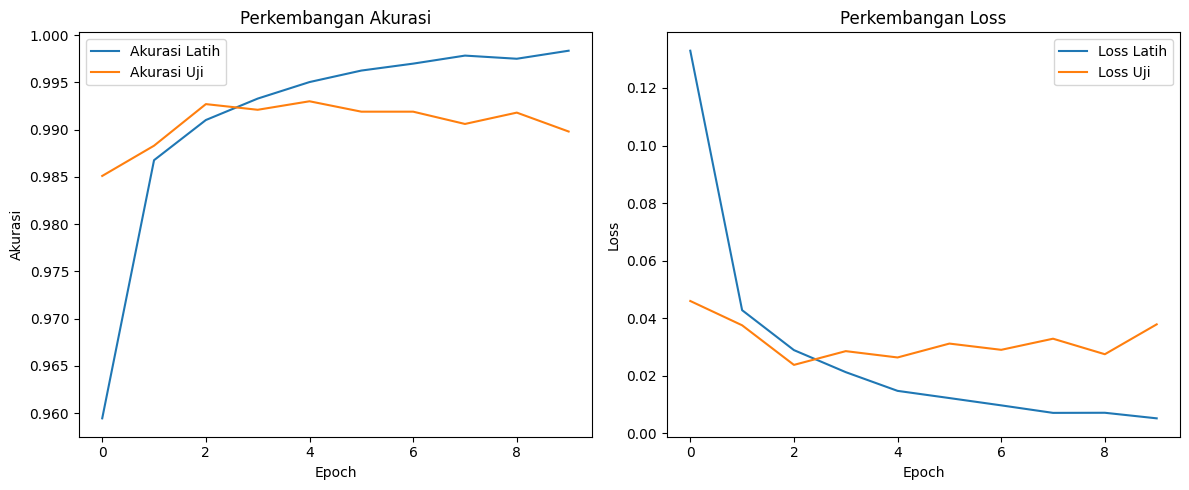

<ipython-input-1-78bdc580b1a5>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Provinsi', y='Populasi', data=df, palette='viridis')


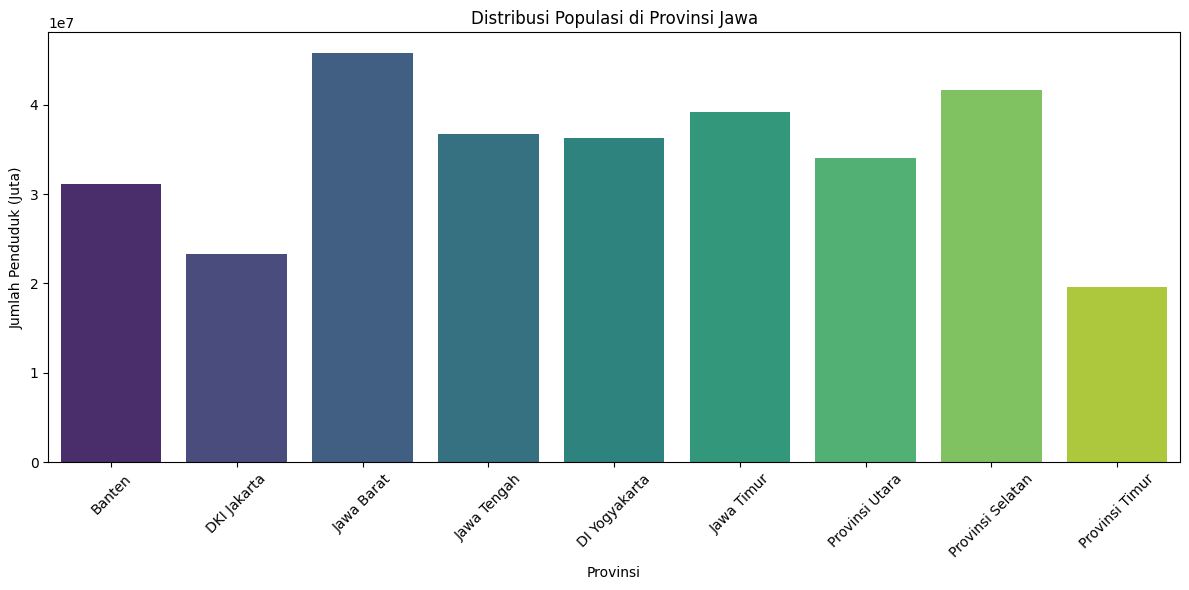

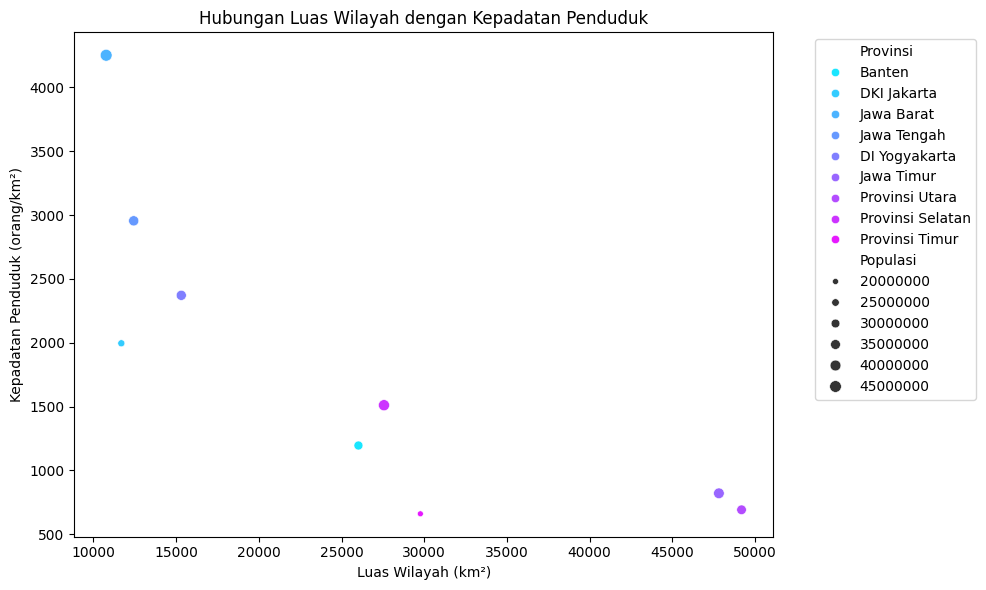

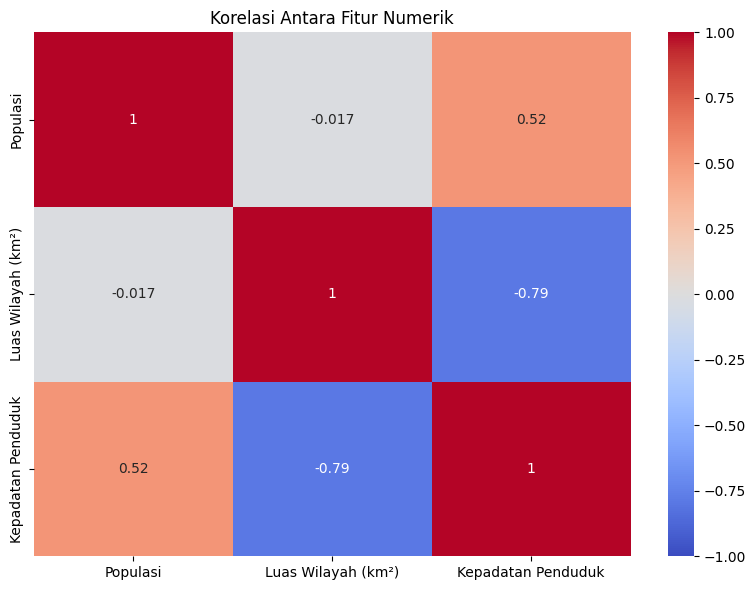

In [ ]:
# Analisa data sebaran penduduk di pulau jawa menggunakan data dummy
#===================================================================


# Bagian 1: Visualisasi CNN untuk MNIST
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Memuat dataset MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data untuk CNN
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Membangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Mengompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Plot akurasi dan loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Akurasi Latih')
plt.plot(history.history['val_accuracy'], label='Akurasi Uji')
plt.title('Perkembangan Akurasi')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Loss Latih')
plt.plot(history.history['val_loss'], label='Loss Uji')
plt.title('Perkembangan Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Bagian 2: Analisis Data Sebaran Penduduk Pulau Jawa (Data Dummy)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Menghasilkan data dummy untuk 9 provinsi di Pulau Jawa
np.random.seed(42)
provinces = ['Banten', 'DKI Jakarta', 'Jawa Barat', 'Jawa Tengah',
             'DI Yogyakarta', 'Jawa Timur', 'Provinsi Utara',
             'Provinsi Selatan', 'Provinsi Timur']

population = np.random.randint(10_000_000, 50_000_000, size=9)
area = np.random.randint(10_000, 50_000, size=9)
density = population / area  # Perhitungan kepadatan penduduk

# Membuat DataFrame
df = pd.DataFrame({
    'Provinsi': provinces,
    'Populasi': population,
    'Luas Wilayah (km²)': area,
    'Kepadatan Penduduk': density.round(2)
})

# Plot 1: Persebaran Populasi Berdasarkan Provinsi
plt.figure(figsize=(12,6))
sns.barplot(x='Provinsi', y='Populasi', data=df, palette='viridis')
plt.title('Distribusi Populasi di Provinsi Jawa')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Penduduk (Juta)')
plt.tight_layout()
plt.show()

# Plot 2: Hubungan Luas Wilayah vs Kepadatan Penduduk
plt.figure(figsize=(10,6))
sns.scatterplot(x='Luas Wilayah (km²)', y='Kepadatan Penduduk',
                size='Populasi', hue='Provinsi', data=df, palette='cool')
plt.title('Hubungan Luas Wilayah dengan Kepadatan Penduduk')
plt.xlabel('Luas Wilayah (km²)')
plt.ylabel('Kepadatan Penduduk (orang/km²)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot 3: Heatmap Korelasi Fitur Numerik
plt.figure(figsize=(8,6))
corr_matrix = df[['Populasi', 'Luas Wilayah (km²)', 'Kepadatan Penduduk']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi Antara Fitur Numerik')
plt.tight_layout()
plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 39ms/step - accuracy: 0.9179 - loss: 0.2726 - val_accuracy: 0.9862 - val_loss: 0.0408
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 33ms/step - accuracy: 0.9872 - loss: 0.0411 - val_accuracy: 0.9886 - val_loss: 0.0339
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9922 - loss: 0.0265 - val_accuracy: 0.9872 - val_loss: 0.0375
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.9945 - loss: 0.0180 - val_accuracy: 0.9868 - val_loss: 0.0377
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9956 - loss: 0.0139 - val_accuracy: 0.9924 - val_loss: 0.0257
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9965 - loss: 0.0098 - val_accuracy: 0.9927 - val_loss: 0.0299
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 34ms/step - accuracy: 0.9973 - loss: 0.0086 - val_accuracy: 0.9914 - val_loss: 0.0280
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9976 -

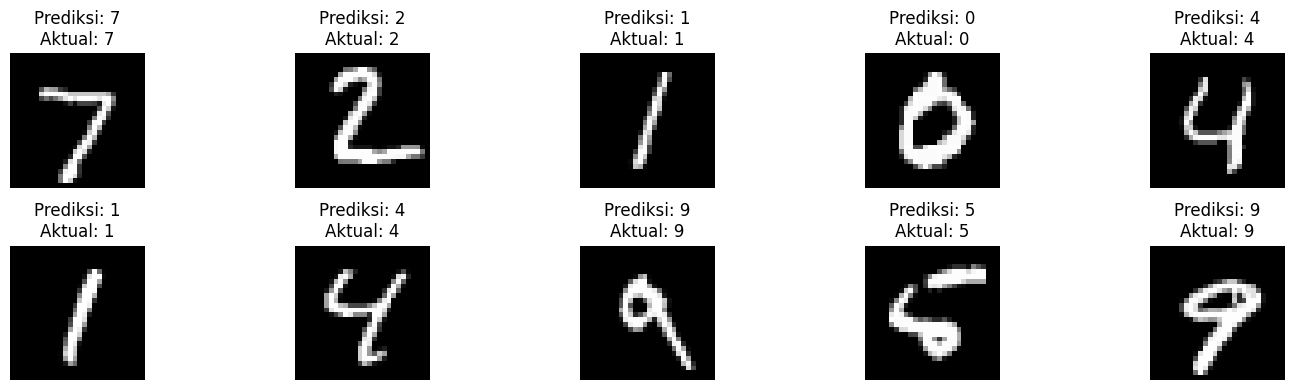


R-squared: 0.00


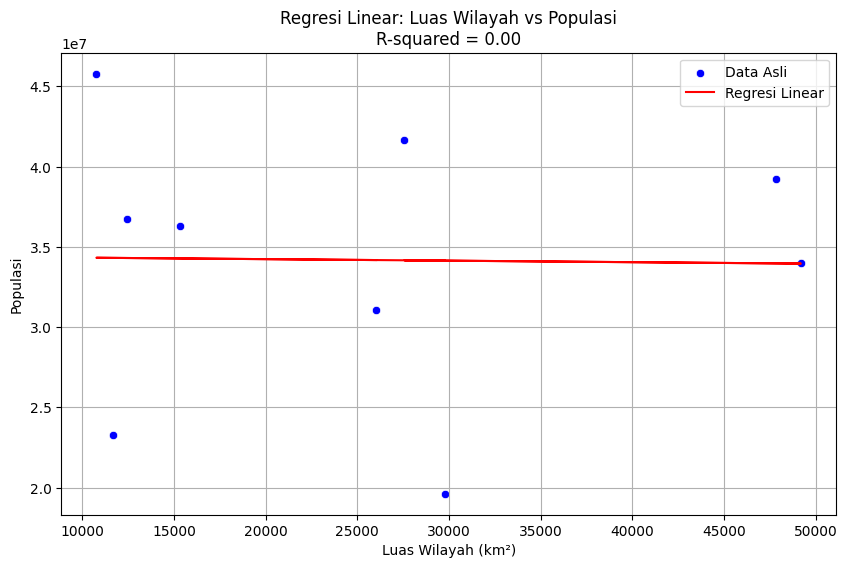

<ipython-input-1-fef6983c8710>:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Provinsi', y='Populasi', data=df, palette='viridis')


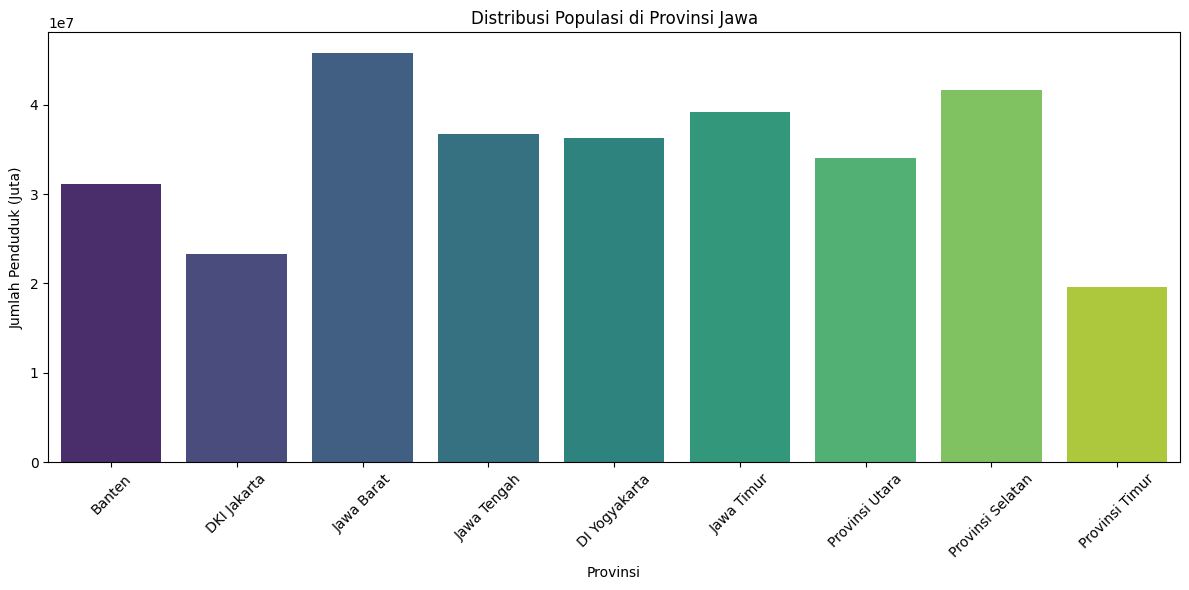

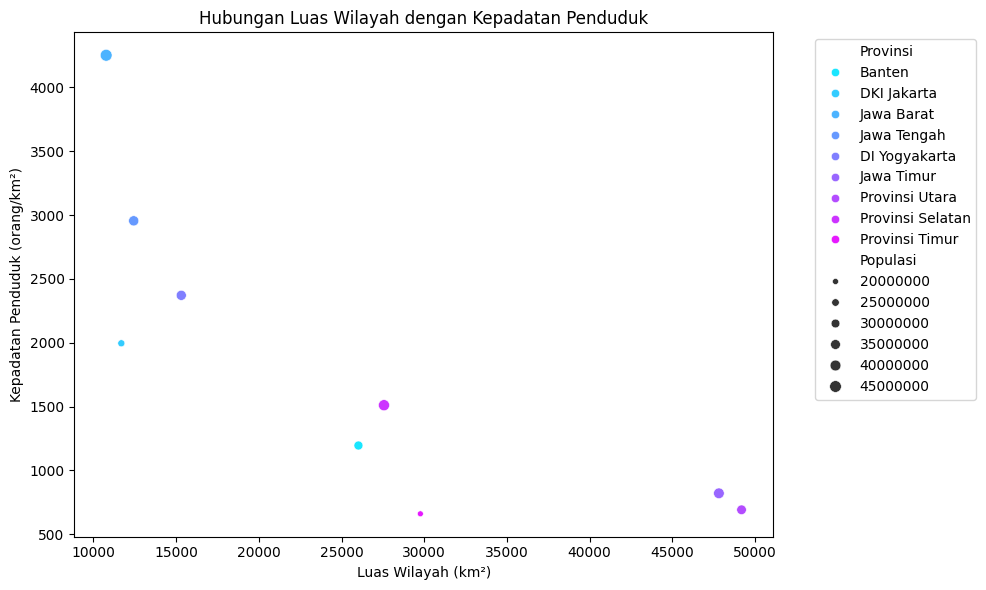

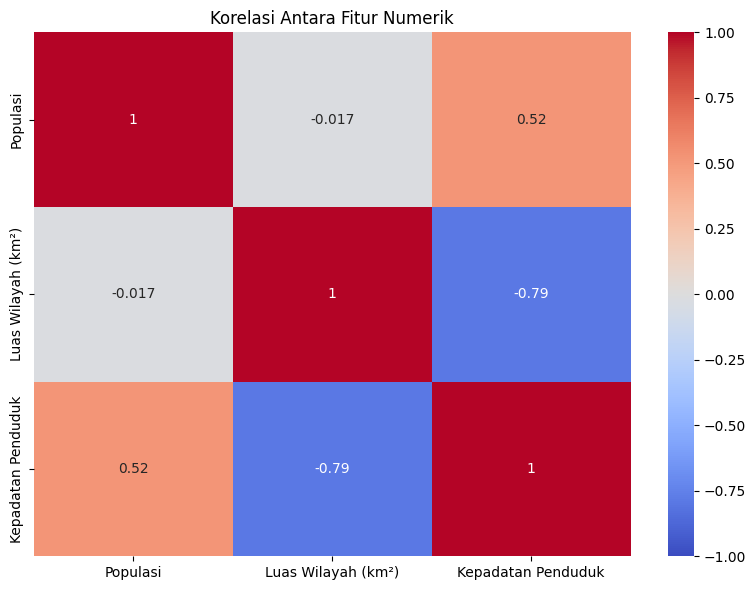

<ipython-input-1-fef6983c8710>:158: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kepadatan Penduduk', y='Provinsi', data=sorted_df,


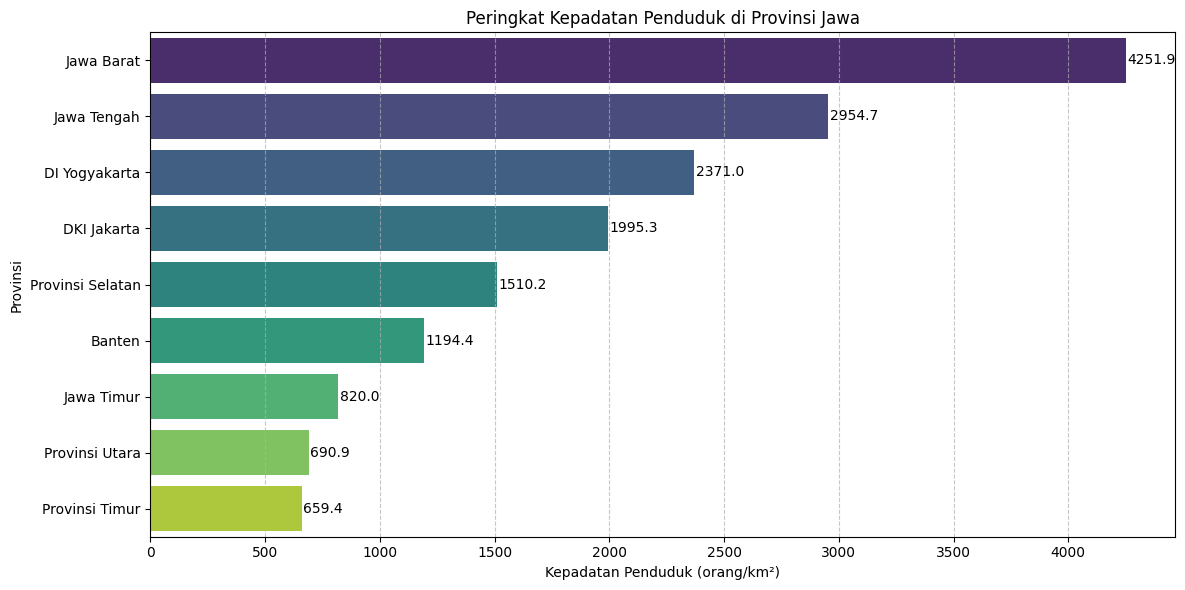

In [1]:
# =====================================================================================
# Analisa & latihan 2: CNN, Prediksi, dan Analisis Regresi dengan Data Dummy
# =====================================================================================

# Bagian 1: CNN untuk MNIST
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Memuat dataset MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data untuk CNN
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Membangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Mengompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


# Bagian 2: Prediksi Model CNN
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nAkurasi Uji: {test_acc:.2f}')

# Ambil beberapa contoh data uji
sample_images = x_test[:10]
sample_labels = y_test[:10]

# Lakukan prediksi
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Tampilkan hasil prediksi
plt.figure(figsize=(15, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Prediksi: {predicted_labels[i]}\nAktual: {sample_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# Bagian 3: Analisis Data Sebaran Penduduk (Data Dummy)

# Menghasilkan data dummy untuk 9 provinsi di Pulau Jawa
np.random.seed(42)
provinces = ['Banten', 'DKI Jakarta', 'Jawa Barat', 'Jawa Tengah',
             'DI Yogyakarta', 'Jawa Timur', 'Provinsi Utara',
             'Provinsi Selatan', 'Provinsi Timur']

population = np.random.randint(10_000_000, 50_000_000, size=9)
area = np.random.randint(10_000, 50_000, size=9)
density = population / area  # Perhitungan kepadatan penduduk

# Membuat DataFrame
df = pd.DataFrame({
    'Provinsi': provinces,
    'Populasi': population,
    'Luas Wilayah (km²)': area,
    'Kepadatan Penduduk': density.round(2)
})


# Bagian 4: Analisis Regresi Linear

# Data yang digunakan:
# X = Luas Wilayah (km²)
# Y = Populasi
X = df[['Luas Wilayah (km²)']].values  # Mengubah menjadi array 2D
y = df['Populasi'].values

# Latih model regresi linear
model_reg = LinearRegression()
model_reg.fit(X, y)

# Prediksi
y_pred = model_reg.predict(X)

# Evaluasi model
r2 = r2_score(y, y_pred)
print(f'\nR-squared: {r2:.2f}')

# Plot hasil regresi
plt.figure(figsize=(10,6))
sns.scatterplot(x=X.flatten(), y=y, label='Data Asli', color='blue')
plt.plot(X, y_pred, color='red', label='Regresi Linear')
plt.title(f'Regresi Linear: Luas Wilayah vs Populasi\nR-squared = {r2:.2f}')
plt.xlabel('Luas Wilayah (km²)')
plt.ylabel('Populasi')
plt.legend()
plt.grid(True)
plt.show()

# Bagian 5: Visualisasi Tambahan (sebelumnya)

# Plot 1: Persebaran Populasi Berdasarkan Provinsi
plt.figure(figsize=(12,6))
sns.barplot(x='Provinsi', y='Populasi', data=df, palette='viridis')
plt.title('Distribusi Populasi di Provinsi Jawa')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Penduduk (Juta)')
plt.tight_layout()
plt.show()

# Plot 2: Hubungan Luas Wilayah vs Kepadatan Penduduk
plt.figure(figsize=(10,6))
sns.scatterplot(x='Luas Wilayah (km²)', y='Kepadatan Penduduk',
                size='Populasi', hue='Provinsi', data=df, palette='cool')
plt.title('Hubungan Luas Wilayah dengan Kepadatan Penduduk')
plt.xlabel('Luas Wilayah (km²)')
plt.ylabel('Kepadatan Penduduk (orang/km²)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot 3: Heatmap Korelasi Fitur Numerik
plt.figure(figsize=(8,6))
corr_matrix = df[['Populasi', 'Luas Wilayah (km²)', 'Kepadatan Penduduk']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi Antara Fitur Numerik')
plt.tight_layout()
plt.show()

# Bagian 6: Visualisasi Tambahan - Kepadatan Penduduk Berdasarkan Provinsi

# Urutkan data berdasarkan kepadatan penduduk (descending)
sorted_df = df.sort_values(by='Kepadatan Penduduk', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Kepadatan Penduduk', y='Provinsi', data=sorted_df,
            palette='viridis', orient='h')
plt.title('Peringkat Kepadatan Penduduk di Provinsi Jawa')
plt.xlabel('Kepadatan Penduduk (orang/km²)')
plt.ylabel('Provinsi')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menambahkan nilai di setiap batang
for i, value in enumerate(sorted_df['Kepadatan Penduduk']):
    plt.text(value + 5, i, f'{value:.1f}', va='center')

plt.tight_layout()
plt.show()

Animasi berhasil disimpan sebagai 'animation_bola.gif'!


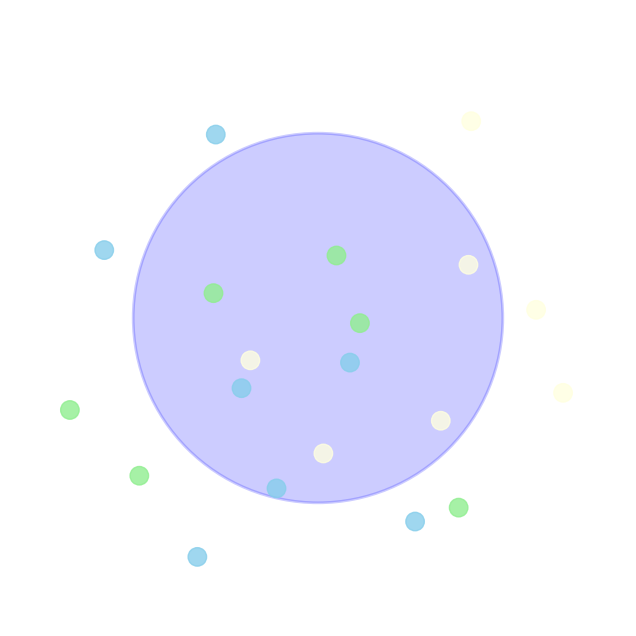

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle

# Parameter Animasi
# =====================================================================================
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_facecolor('#F0F0F0')  # Warna latar belakang
ax.axis('off')

# Bola Besar (Transparent)
# =====================================================================================
radius_big = 3.0
big_ball = Circle((0, 0), radius_big,
                 edgecolor='blue',
                 facecolor='blue',
                 alpha=0.2,
                 linewidth=2)
ax.add_patch(big_ball)

# Bola Kecil (Warna-warni)
# =====================================================================================
num_small_balls = 20
small_radius = 0.15
colors = ['#87CEEB', '#90EE90', '#FFFFE0']  # Biru muda, Hijau muda, Kuning

balls = []
for _ in range(num_small_balls):
    r = np.random.uniform(0.5, 4.5)  # Jarak dari pusat
    speed = np.random.uniform(0.05, 0.2)  # Kecepatan
    direction = np.random.choice([-1, 1])  # Arah putar
    angle = np.random.uniform(0, 2*np.pi)
    color = np.random.choice(colors)

    ball = Circle((0, 0), small_radius,
                 color=color,
                 alpha=0.8,
                 zorder=3)
    ax.add_patch(ball)
    balls.append({'ball': ball,
                 'r': r,
                 'speed': speed,
                 'direction': direction,
                 'angle': angle})

# Fungsi Animasi
# =====================================================================================
def update(frame):
    for ball_data in balls:
        angle = ball_data['angle'] + frame * ball_data['speed'] * ball_data['direction']
        x = ball_data['r'] * np.cos(angle)
        y = ball_data['r'] * np.sin(angle)
        ball_data['ball'].center = (x, y)
    return [ball['ball'] for ball in balls]


# Simpan sebagai GIF
# =====================================================================================
ani = FuncAnimation(fig, update,
                   frames=200,
                   interval=30,  # Durasi per frame (ms)
                   blit=True,
                   repeat=True)

# Simpan animasi sebagai file GIF
ani.save('animation_bola.gif',
        writer='pillow',
        fps=30,
        dpi=80)  # dpi=80 untuk mengurangi ukuran file

print("Animasi berhasil disimpan sebagai 'animation_bola.gif'!")